In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"athuldev0007","key":"7b15881bfb38f01779e78eb133af80e1"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import json, os

with open('/root/.kaggle/kaggle.json') as f:
    data = json.load(f)

os.environ['KAGGLE_USERNAME'] = data['username']
os.environ['KAGGLE_KEY'] = data['key']


In [ ]:
!curl -L -u $KAGGLE_USERNAME:$KAGGLE_KEY \
"https://www.kaggle.com/api/v1/datasets/download/aletbm/aerial-imagery-dataset-floodnet-challenge" \
-o /content/floodnet.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 23.2G  100 23.2G    0     0  20.6M      0  0:19:13  0:19:13 --:--:-- 21.2M


In [ ]:
!unzip -o "/content/floodnet.zip" -d "/content/floodnet"

Streaming output truncated to the last 5000 lines.
  inflating: /content/floodnet/FloodNet Challenge - Track 1/Test/image/6850.jpg  
  inflating: /content/floodnet/FloodNet Challenge - Track 1/Test/image/6856.jpg  
  inflating: /content/floodnet/FloodNet Challenge - Track 1/Test/image/6893.jpg  
  inflating: /content/floodnet/FloodNet Challenge - Track 1/Test/image/6895.jpg  
  inflating: /content/floodnet/FloodNet Challenge - Track 1/Test/image/6896.jpg  
  inflating: /content/floodnet/FloodNet Challenge - Track 1/Test/image/6898.jpg  
  inflating: /content/floodnet/FloodNet Challenge - Track 1/Test/image/6905.jpg  
  inflating: /content/floodnet/FloodNet Challenge - Track 1/Test/image/6906.jpg  
  inflating: /content/floodnet/FloodNet Challenge - Track 1/Test/image/6907.jpg  
  inflating: /content/floodnet/FloodNet Challenge - Track 1/Test/image/6910.jpg  
  inflating: /content/floodnet/FloodNet Challenge - Track 1/Test/image/6912.jpg  
  inflating: /content/floodnet/FloodNet Challen

In [ ]:
!ls -R "/content/floodnet"

/content/floodnet:
'FloodNet Challenge - Track 1'	'FloodNet Challenge - Track 2'	 train

'/content/floodnet/FloodNet Challenge - Track 1':
class_mapping.csv  Test  Train	Validation

'/content/floodnet/FloodNet Challenge - Track 1/Test':
image

'/content/floodnet/FloodNet Challenge - Track 1/Test/image':
10163.jpg  6632.jpg  6963.jpg  7413.jpg  7821.jpg  8076.jpg  8363.jpg  8934.jpg
10164.jpg  6638.jpg  6979.jpg  7415.jpg  7822.jpg  8100.jpg  8364.jpg  8937.jpg
10167.jpg  6659.jpg  7004.jpg  7420.jpg  7835.jpg  8103.jpg  8367.jpg  8942.jpg
10174.jpg  6663.jpg  7016.jpg  7423.jpg  7839.jpg  8104.jpg  8372.jpg  8945.jpg
10183.jpg  6671.jpg  7023.jpg  7431.jpg  7840.jpg  8111.jpg  8376.jpg  8948.jpg
10808.jpg  6672.jpg  7029.jpg  7450.jpg  7853.jpg  8112.jpg  8378.jpg  8949.jpg
10812.jpg  6677.jpg  7031.jpg  7457.jpg  7866.jpg  8115.jpg  8391.jpg  8959.jpg
10813.jpg  6679.jpg  7035.jpg  7461.jpg  7874.jpg  8125.jpg  8397.jpg  8961.jpg
10814.jpg  6680.jpg  7041.jpg  7464.jpg  7876.jpg  8126

In [ ]:
BASE_DIR = "/content/floodnet/FloodNet Challenge - Track 1/Train/Labeled"

In [ ]:
MERGED_IMG_DIR = "/content/floodnet/train/images"
MERGED_MASK_DIR = "/content/floodnet/train/masks"

In [ ]:
import os, shutil
from glob import glob

BASE_PATH = BASE_DIR

MERGED_IMG_DIR = "/content/floodnet_train/images"
MERGED_MASK_DIR = "/content/floodnet_train/masks"

os.makedirs(MERGED_IMG_DIR, exist_ok=True)
os.makedirs(MERGED_MASK_DIR, exist_ok=True)

flooded_img = glob(os.path.join(BASE_PATH, "Flooded/image/*.jpg"))
flooded_mask = glob(os.path.join(BASE_PATH, "Flooded/mask/*.png"))
nonflooded_img = glob(os.path.join(BASE_PATH, "Non-Flooded/image/*.jpg"))
nonflooded_mask = glob(os.path.join(BASE_PATH, "Non-Flooded/mask/*.png"))

print("Flooded:", len(flooded_img), "Non-Flooded:", len(nonflooded_img))

for src in flooded_img + nonflooded_img:
    shutil.copy(src, MERGED_IMG_DIR)

for src in flooded_mask + nonflooded_mask:
    shutil.copy(src, MERGED_MASK_DIR)

print("Merging complete.")


Flooded: 51 Non-Flooded: 347
Merging complete.


In [ ]:
MERGED_IMG_DIR = "/content/floodnet/train/images"
MERGED_MASK_DIR = "/content/floodnet/train/masks"

In [ ]:
import os, shutil
from glob import glob

# BASE PATH of unzipped dataset:
BASE_PATH = "/content/floodnet/FloodNet Challenge - Track 1/Train/Labeled"

MERGED_IMG_DIR = "/content/floodnet/train/images"
MERGED_MASK_DIR = "/content/floodnet/train/masks"

os.makedirs(MERGED_IMG_DIR, exist_ok=True)
os.makedirs(MERGED_MASK_DIR, exist_ok=True)

# Source folders
flooded_img = glob(os.path.join(BASE_PATH, "Flooded/image/*.jpg"))
flooded_mask = glob(os.path.join(BASE_PATH, "Flooded/mask/*.png"))
nonflooded_img = glob(os.path.join(BASE_PATH, "Non-Flooded/image/*.jpg"))
nonflooded_mask = glob(os.path.join(BASE_PATH, "Non-Flooded/mask/*.png"))

print(f"Flooded images: {len(flooded_img)} | Non-Flooded images: {len(nonflooded_img)}")
print(f"Flooded masks:  {len(flooded_mask)} | Non-Flooded masks:  {len(nonflooded_mask)}")

# Merge images
for src in flooded_img + nonflooded_img:
    shutil.copy(src, MERGED_IMG_DIR)

# Merge masks
for src in flooded_mask + nonflooded_mask:
    shutil.copy(src, MERGED_MASK_DIR)

print("✅ Merging complete!")
print("Merged images:", len(os.listdir(MERGED_IMG_DIR)))
print("Merged masks :", len(os.listdir(MERGED_MASK_DIR)))


Flooded images: 51 | Non-Flooded images: 347
Flooded masks:  51 | Non-Flooded masks:  347
✅ Merging complete!
Merged images: 398
Merged masks : 398


Images dir exists: True
Masks dir exists : True
Total merged images: 398
Total merged masks : 398
Sample image filenames: ['10165.jpg', '10166.jpg', '10175.jpg', '10176.jpg', '10687.jpg']
Sample mask filenames: ['10165_lab.png', '10166_lab.png', '10175_lab.png', '10176_lab.png', '10687_lab.png']
Using: 10165.jpg and 10165_lab.png
Mask unique values: [5]


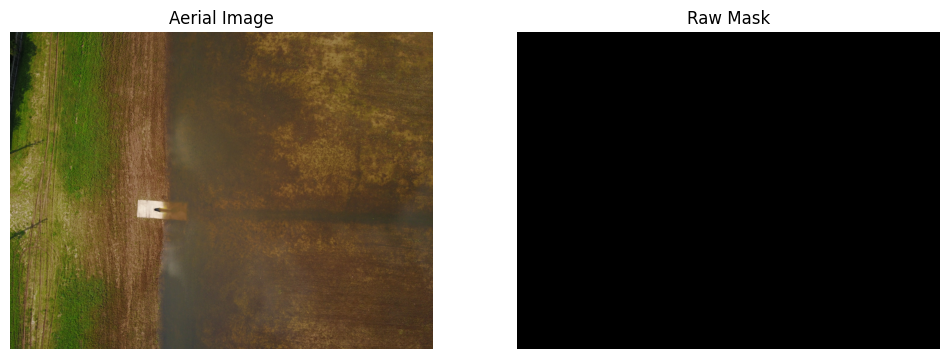

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

MERGED_IMG_DIR = "/content/floodnet/train/images"
MERGED_MASK_DIR = "/content/floodnet/train/masks"

print("Images dir exists:", os.path.exists(MERGED_IMG_DIR))
print("Masks dir exists :", os.path.exists(MERGED_MASK_DIR))

img_files = sorted([f for f in os.listdir(MERGED_IMG_DIR) if f.endswith(".jpg")])
mask_files = sorted([f for f in os.listdir(MERGED_MASK_DIR) if f.endswith(".png")])

print("Total merged images:", len(img_files))
print("Total merged masks :", len(mask_files))

print("Sample image filenames:", img_files[:5])
print("Sample mask filenames:", mask_files[:5])


sample_img = img_files[0]
sample_mask = sample_img.replace(".jpg", "_lab.png")

img_path = os.path.join(MERGED_IMG_DIR, sample_img)
mask_path = os.path.join(MERGED_MASK_DIR, sample_mask)

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

print("Using:", sample_img, "and", sample_mask)
print("Mask unique values:", np.unique(mask))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Aerial Image"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(mask, cmap="gray"); plt.title("Raw Mask"); plt.axis("off")
plt.show()


In [ ]:
from torch.utils.data import DataLoader, random_split

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import glob

class FloodNetDisasterDataset(Dataset):
    def __init__(self, img_dir, mask_dir, transform=None):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.transform = transform


        self.img_files = sorted(glob.glob(os.path.join(img_dir, "*.jpg")))
        self.mask_files = []

        for img_path in self.img_files:
            base = os.path.splitext(os.path.basename(img_path))[0]  # e.g., "10165"
            mask_name = base + "_lab.png"
            mask_path = os.path.join(mask_dir, mask_name)
            if not os.path.exists(mask_path):
                raise FileNotFoundError(f"Mask not found for {img_path}: expected {mask_path}")
            self.mask_files.append(mask_path)

        print(f"Total image–mask pairs: {len(self.img_files)}")

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_path = self.img_files[idx]
        mask_path = self.mask_files[idx]


        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)


        disaster_classes = [1, 3]
        binary_mask = np.isin(mask, disaster_classes).astype(np.float32)  # 1 = affected, 0 = non-affected


        img = cv2.resize(img, (256, 256))
        binary_mask = cv2.resize(binary_mask, (256, 256), interpolation=cv2.INTER_NEAREST)


        img = img.astype(np.float32) / 255.0


        img = torch.tensor(img).permute(2, 0, 1)      # [3, 256, 256]
        mask = torch.tensor(binary_mask).unsqueeze(0) # [1, 256, 256]

        return img, mask

        from torch.utils.data import random_split, DataLoader


train_size = int(0.8 * len(dataset))
val_size   = len(dataset) - train_size

train_ds, val_ds = random_split(
    dataset,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)  # reproducibility
)

train_loader = DataLoader(
    train_ds,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

val_loader = DataLoader(
    val_ds,
    batch_size=4,
    shuffle=False,
    num_workers=2
)

print(f"Train samples: {len(train_ds)}")
print(f"Val samples  : {len(val_ds)}")






Train samples: 318
Val samples  : 80


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),

            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.block(x)

class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1):
        super().__init__()

        # Encoder
        self.enc1 = DoubleConv(in_channels, 64)
        self.enc2 = DoubleConv(64, 128)
        self.enc3 = DoubleConv(128, 256)
        self.enc4 = DoubleConv(256, 512)

        self.pool = nn.MaxPool2d(2)

        # Decoder
        self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.dec3 = DoubleConv(512 + 256, 256)
        self.dec2 = DoubleConv(256 + 128, 128)
        self.dec1 = DoubleConv(128 + 64, 64)


        self.out = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool(e1))
        e3 = self.enc3(self.pool(e2))
        e4 = self.enc4(self.pool(e3))

        # Decoder with skip connections
        d3 = self.dec3(torch.cat([self.up(e4), e3], dim=1))
        d2 = self.dec2(torch.cat([self.up(d3), e2], dim=1))
        d1 = self.dec1(torch.cat([self.up(d2), e1], dim=1))

        # Sigmoid → probability map
        return self.out(d1)


device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

model = UNet().to(device)


Using device: cuda


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm



class DiceBCELoss(nn.Module):
    def __init__(self, smooth=1e-5, pos_weight=5.0):
        super().__init__()

        # Weighted BCE for class imbalance
        self.bce = nn.BCEWithLogitsLoss(
            pos_weight=torch.tensor([pos_weight]).to(device)
        )
        self.smooth = smooth

    def forward(self, logits, targets):
        # BCE loss (expects logits)
        bce_loss = self.bce(logits, targets)

        # Dice loss
        probs = torch.sigmoid(logits)
        probs = probs.view(-1)
        targets = targets.view(-1)

        intersection = (probs * targets).sum()
        dice = (2. * intersection + self.smooth) / \
               (probs.sum() + targets.sum() + self.smooth)

        dice_loss = 1 - dice

        return bce_loss + dice_loss


criterion = DiceBCELoss(pos_weight=5.0)   # try 3–8 if recall is low
optimizer = optim.Adam(model.parameters(), lr=1e-4)



num_epochs = 30

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    loop = tqdm(loader, desc=f"Epoch [{epoch+1}/{num_epochs}]", leave=False)
    for imgs, masks in loop:
        imgs = imgs.to(device)
        masks = masks.to(device)

        logits = model(imgs)          # NO sigmoid in model
        loss = criterion(logits, masks)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        loop.set_postfix(loss=loss.item())

    avg_loss = total_loss / len(loader)
    print(f"Epoch [{epoch+1}/{num_epochs}] ➜ Avg Loss: {avg_loss:.4f}")



torch.save(model.state_dict(), "unet_floodnet.pth")
print("✅ Model saved as 'unet_floodnet.pth'")


Epoch [1/30] ➜ Avg Loss: 1.5465


Epoch [2/30] ➜ Avg Loss: 1.4325


Epoch [3/30] ➜ Avg Loss: 1.4142


Epoch [4/30] ➜ Avg Loss: 1.3894


Epoch [5/30] ➜ Avg Loss: 1.3574


Epoch [6/30] ➜ Avg Loss: 1.3108


Epoch [7/30] ➜ Avg Loss: 1.2906


Epoch [8/30] ➜ Avg Loss: 1.2846


Epoch [9/30] ➜ Avg Loss: 1.2749


Epoch [10/30] ➜ Avg Loss: 1.2526


Epoch [11/30] ➜ Avg Loss: 1.2437


Epoch [12/30] ➜ Avg Loss: 1.2128


Epoch [13/30] ➜ Avg Loss: 1.2396


Epoch [14/30] ➜ Avg Loss: 1.1640


Epoch [15/30] ➜ Avg Loss: 1.1666


Epoch [16/30] ➜ Avg Loss: 1.1466


Epoch [17/30] ➜ Avg Loss: 1.1219


Epoch [18/30] ➜ Avg Loss: 1.1570


Epoch [19/30] ➜ Avg Loss: 1.1041


Epoch [20/30] ➜ Avg Loss: 1.0615


Epoch [21/30] ➜ Avg Loss: 1.0828


Epoch [22/30] ➜ Avg Loss: 1.0925


Epoch [23/30] ➜ Avg Loss: 1.0731


Epoch [24/30] ➜ Avg Loss: 1.0576


Epoch [25/30] ➜ Avg Loss: 1.0303


Epoch [26/30] ➜ Avg Loss: 1.0559


Epoch [27/30] ➜ Avg Loss: 1.0722


Epoch [28/30] ➜ Avg Loss: 1.0613


Epoch [29/30] ➜ Avg Loss: 1.0911


Epoch [30/30] ➜ Avg Loss: 1.0148
✅ Model saved as 'unet_floodnet.pth'


In [ ]:
!cp /content/unet_floodnet.pth "/content/drive/MyDrive/unet_floodnet.pth"
print("✅ Copied model to Drive at: /content/drive/MyDrive/unet_floodnet.pth")

✅ Copied model to Drive at: /content/drive/MyDrive/unet_floodnet.pth


In [ ]:
from google.colab import files
files.download("unet_floodnet.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-305762565.py:38: UserWarning: Glyph 128752 (\N{SATELLITE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-305762565.py:38: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-305762565.py:38: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


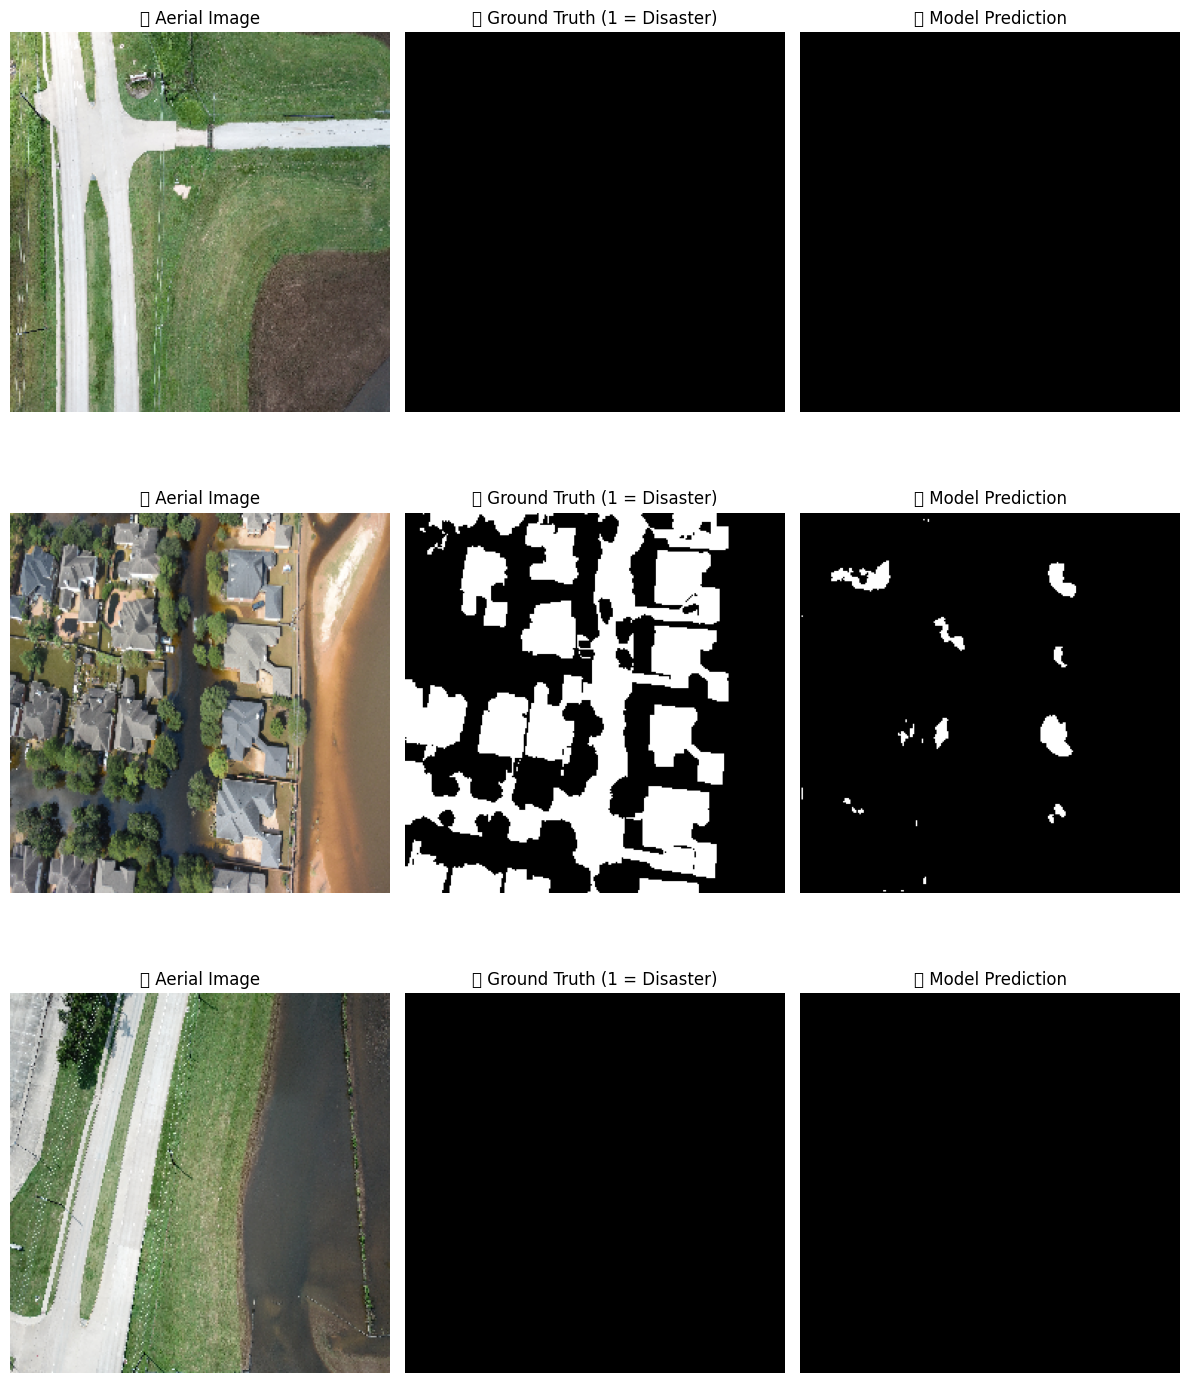

In [ ]:
import random

model.eval()
num_samples = 3
indices = random.sample(range(len(dataset)), num_samples)

plt.figure(figsize=(12, 5 * num_samples))

for i, idx in enumerate(indices):
    img, mask = dataset[idx]
    img_in = img.unsqueeze(0).to(device)

    with torch.no_grad():
        pred = model(img_in).cpu().squeeze().numpy()

    img_np = img.cpu().permute(1, 2, 0).numpy()
    mask_np = mask.squeeze().numpy()
    pred_bin = (pred > 0.5).astype(np.uint8)

    img_np = np.clip(img_np, 0, 1)
    mask_np = (mask_np > 0.5).astype(np.uint8)

    plt.subplot(num_samples, 3, i*3 + 1)
    plt.imshow(img_np)
    plt.title("🛰️ Aerial Image")
    plt.axis("off")

    plt.subplot(num_samples, 3, i*3 + 2)
    plt.imshow(mask_np, cmap="gray")
    plt.title("🎯 Ground Truth (1 = Disaster)")
    plt.axis("off")

    plt.subplot(num_samples, 3, i*3 + 3)
    plt.imshow(pred_bin, cmap="gray")
    plt.title("🤖 Model Prediction")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import os

print(os.listdir("/content"))


['.config', 'images (1).jpg', 'kaggle (1).json', 'floodnet_train', 'floodnet.zip', 'floodnet', 'drive', 'download.jpg', 'images.jpg', 'unet_floodnet.pth', 'download (1).jpg', 'sample_data']


✅ Model loaded for inference.


Saving images.jpg to images (2).jpg


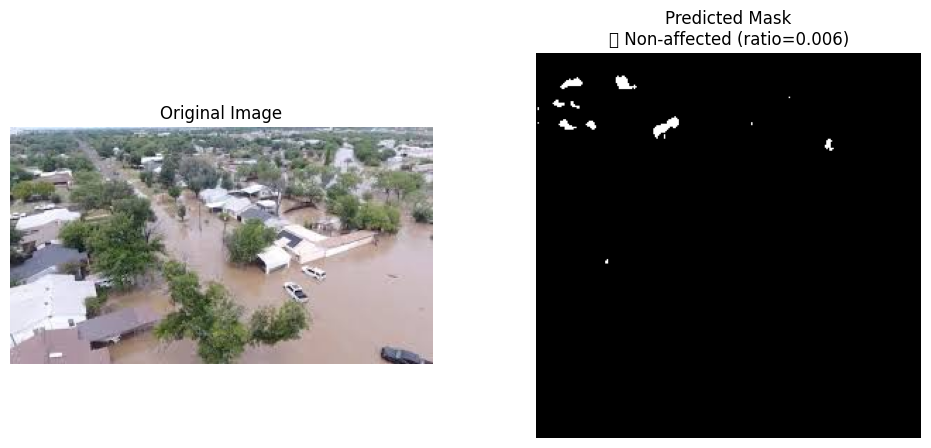

Flood ratio: 0.006 | Classification: ✅ Non-affected


'✅ Non-affected'

In [ ]:

model = UNet().to(device)
model.load_state_dict(torch.load("unet_floodnet.pth", map_location=device))
model.eval()
print("✅ Model loaded for inference.")

def predict_disaster(image_path, model, device, threshold=0.1):
    """
    Binary decision using segmentation:
    - threshold controls how much affected area is needed to call it "disaster"
    """
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (256, 256))

    tensor = torch.tensor(img_resized).permute(2, 0, 1).unsqueeze(0).float() / 255.0
    tensor = tensor.to(device)

    with torch.no_grad():
        pred_mask = model(tensor).cpu().squeeze().numpy()

    pred_binary = (pred_mask > 0.3).astype(np.uint8)
    flood_ratio = pred_binary.mean()

    if flood_ratio > threshold:
        label = "🌊 Disaster affected"
    else:
        label = "✅ Non-affected"

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(pred_binary, cmap="gray")
    plt.title(f"Predicted Mask\n{label} (ratio={flood_ratio:.3f})")
    plt.axis("off")

    plt.show()
    print(f"Flood ratio: {flood_ratio:.3f} | Classification: {label}")
    return label


from google.colab import files
uploaded = files.upload()


test_image_name = list(uploaded.keys())[0]
test_image_path = f"/content/{test_image_name}"

predict_disaster(test_image_path, model, device)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch


In [ ]:
model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for imgs, masks in val_loader:
        imgs = imgs.to(device)
        masks = masks.to(device)

        outputs = model(imgs)
        probs = torch.sigmoid(outputs)
        preds = (probs > 0.1).float()

        all_preds.extend(preds.cpu().numpy().ravel())
        all_targets.extend(masks.cpu().numpy().ravel())


In [ ]:
accuracy  = accuracy_score(all_targets, all_preds)
precision = precision_score(all_targets, all_preds, zero_division=0)
recall    = recall_score(all_targets, all_preds, zero_division=0)
f1        = f1_score(all_targets, all_preds, zero_division=0)

print("📊 Evaluation Metrics")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


📊 Evaluation Metrics
Accuracy : 0.9187
Precision: 0.3415
Recall   : 0.8942
F1 Score : 0.4942


In [ ]:
cm = confusion_matrix(all_targets, all_preds)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[4608323  401659]
 [  24635  208263]]


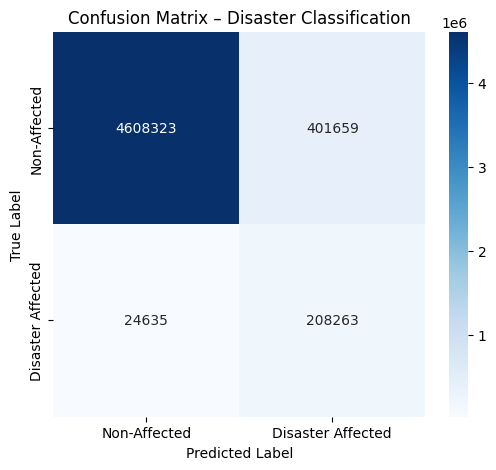

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Non-Affected", "Disaster Affected"],
    yticklabels=["Non-Affected", "Disaster Affected"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Disaster Classification")
plt.show()
